# Assignment 7
- by Martim Silva 51304 and Alexandre Sobreira 59451

In [3]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import mean_squared_error

-For this assignment 2 models (LSTM and FTLFN) will be used and tested using diferent data generated first using a sinosoidal function (Problem 1) and after using a autoregression (Problem 2). 
    - THe models will also be applyied to data with and without noise.
- Below can be seen the functions created for the problems at hand.
    - first a function for the LSTM model
    - second the function for the FTLFN model
    - Both functions include plots (Loss and Predictions) in order to analyse their learning curve as well as their performance.
    - THe mse's will also be printed in order to compare the 1st fit with the 2nd to analysi the impact of the burn in effect
    - given that this is a single output problem the last Dense layer has size 1

In [25]:
def lstm_func(nrEpochs, X, y):
    ## LSTM Model
    lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((12,1)),    # The input layer will be lag
    tf.keras.layers.LSTM(10),  # Since we have an imput of 12 it doesnt make sence to use higher than that # trocar par DENSE
    tf.keras.layers.Dense(1, activation="tanh"), # Since I want to predict 1 value I want to output 1!
    ])
    ## Compile
    lstm_model.compile(optimizer = "Adam", loss = "mse")
    ##Adapt X
    X_lstm = np.expand_dims(X, axis = 2)
    ## 1st split
    X_lstm_train1 = X_lstm[:2400]
    y_lstm_train1 = y[:2400]
    # normalization
    train1_mean = X_lstm_train1.mean()
    train1_std = X_lstm_train1.std()
    X_lstm_train1 = (X_lstm_train1 - train1_mean) / train1_std
    ### fit 
    history_lstm1 = lstm_model.fit(X_lstm_train1, y_lstm_train1, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ### pred
    X_lstm_test1 = X_lstm[2401:2501]
    y_lstm_test1 = y[2401:2501]
    # normalization
    X_lstm_test1 = (X_lstm_test1 - train1_mean) / train1_std
    y_pred1 = lstm_model.predict(X_lstm_test1)
    mse1 = mean_squared_error(y_lstm_test1, y_pred1)
    print("The mse for the 1st split is: " + str(mse1))
    ####### 2nd split and fit #######
    X_lstm_train2=X_lstm[2401:4900]
    y_lstm_train2=y[2401:4900]
    #normalization
    train2_mean = X_lstm_train2.mean()
    train2_std = X_lstm_train2.std()
    X_lstm_train2 = (X_lstm_train2 - train2_mean) / train2_std
    ### fit 
    history_lstm2 = lstm_model.fit(X_lstm_train2, y_lstm_train2, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ###pred
    X_lstm_test2 = X_lstm[4901:]
    y_lstm_test2 = y[4901:]
    # normalization
    X_lstm_test2 = (X_lstm_test2 - train2_mean) / train2_std
    y_pred2 = lstm_model.predict(X_lstm_test2)
    mse2 = mean_squared_error(y_lstm_test2, y_pred2)
    print("The mse for the 2nd split is: " + str(mse2))


    ## PLots for learning curves (loss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history_lstm1.history['loss'], label="loss")
    ax1.set_title("Loss Plot 1st split")
   
    ax2.plot(history_lstm2.history['loss'], label="loss")
    ax2.set_title("Loss Plot 2nd split")
    
    plt.show()

    ## Plots for predictions and expected results 2
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,15))

    ax1.set_title("Train, Test and Predicted Results for 1st split")
    ax1.plot(y_lstm_train1,  label="Train")
    ax1.plot([None for i in y_lstm_train1] + [x for x in y_lstm_test1], label="Test", lw = 2)
    ax1.plot([None for i in y_lstm_train1] + [x for x in y_pred1], label="Predicted", linestyle = ":", lw = 3)
    ax1.legend(loc="upper left", prop= {"size": 15}) 
    ax1.tick_params(labelsize=15)

    ax2.set_title("Train, Test and Predicted Results for 2nd split")
    ax2.plot(y_lstm_train2,  label="Train")
    ax2.plot([None for i in y_lstm_train2] + [x for x in y_lstm_test2], label="Test", lw = 2)
    ax2.plot([None for i in y_lstm_train2] + [x for x in y_pred2], label="Predicted", linestyle = ":", lw = 3)
    ax2.legend(loc="upper left", prop= {"size": 15}) 
    ax2.tick_params(labelsize=15)

    plt.show()

In [44]:
def ftlfn_func(nrEpochs, X, y): 
    ## FTLFN Model
    ftlf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=X.shape[1]),    
    tf.keras.layers.Dense(1),  
    ])
    ## Compile
    ftlf_model.compile(optimizer = "Adam", loss = "mse")
    ##Adapt X
    X = np.expand_dims(X, axis = 2)
    y = np.array(y)
    ## 1st split
    X_ftlfn_train1 = X[:2400]
    y_ftlfn_train1 = y[:2400]
    # normalization
    train1_mean = X_ftlfn_train1.mean()
    train1_std = X_ftlfn_train1.std()
    X_ftlfn_train1 = (X_ftlfn_train1 - train1_mean) / train1_std
    ### fit 
    history_ftlfn1 = ftlf_model.fit(X_ftlfn_train1, y_ftlfn_train1, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ### pred
    X_ftlfn_test1 = X[2401:2501]
    y_ftlfn_test1 = y[2401:2501]
    # normalization
    X_ftlfn_test1 = (X_ftlfn_test1 - train1_mean) / train1_std
    y_pred1 = ftlf_model.predict(X_ftlfn_test1)
    mse1 = mean_squared_error(y_ftlfn_test1, y_pred1)
    print("The mse for the 1st split is: " + str(mse1))

    ####### 2nd split and fit #######
    X_ftlfn_train2=X[2401:4900]
    y_ftlfn_train2=y[2401:4900]
    #normalization
    train2_mean = X_ftlfn_train2.mean()
    train2_std = X_ftlfn_train2.std()
    X_ftlfn_train2 = (X_ftlfn_train2 - train2_mean) / train2_std
    ### fit 
    history_ftlfn2 = ftlf_model.fit(X_ftlfn_train2, y_ftlfn_train2, batch_size=1, epochs=nrEpochs, shuffle=False, verbose=False)
    ###pred
    X_ftlfn_test2 = X[4901:]
    y_ftlfn_test2 = y[4901:]
    # normalization
    X_ftlfn_test2 = (X_ftlfn_test2 - train2_mean) / train2_std
    y_pred2 = ftlf_model.predict(X_ftlfn_test2)
    mse2 = mean_squared_error(y_ftlfn_test2, y_pred2)
    print("The mse for the 2nd split is: " + str(mse2))
    
    ## PLots for learning curves (loss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    ax1.plot(history_ftlfn1.history['loss'], label="loss")
    ax1.set_title("Loss Plot 1st split")
   
    ax2.plot(history_ftlfn2.history['loss'], label="loss")
    ax2.set_title("Loss Plot 2nd split")
    
    plt.show()

    ## Plots for predictions and expected results 2
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35,15))

    ax1.set_title("Train, Test and Predicted Results for 1st split")
    ax1.plot(y_ftlfn_train1,  label="Train")
    ax1.plot([None for i in y_ftlfn_train1] + [x for x in y_ftlfn_test1], label="Test", lw = 2)
    ax1.plot([None for i in y_ftlfn_train1] + [x for x in y_pred1], label="Predicted", linestyle = ":", lw = 3)
    ax1.legend(loc="upper left", prop= {"size": 15}) 
    ax1.tick_params(labelsize=15)

    ax2.set_title("Train, Test and Predicted Results for 2nd split")
    ax2.plot(y_ftlfn_train2,  label="Train")
    ax2.plot([None for i in y_ftlfn_train2] + [x for x in y_ftlfn_test2], label="Test", lw = 2)
    ax2.plot([None for i in y_ftlfn_train2] + [x for x in y_pred2], label="Predicted", linestyle = ":", lw = 3)
    ax2.legend(loc="upper left", prop= {"size": 15}) 
    ax2.tick_params(labelsize=15)

    plt.show()

- Regarding the above functions:
    - For this type of problem, since we are comparing values, the MSE is the best lostsfunction, for images would be the cross entropy for example.
    - The fit shuffles by default and we dont want that, we want to preserva the order, therefore shuffle = False 

# Problem 1
- Use as a time series a sinusoidal function with 100 periods and 50 points per period

- The data will be obtain using The sin function:
-  We consturct a data set  which has 12 datapoints and the label.
    - A "shift" will be made every 12 points.
        - We need to use a filter of 12 (we are going to observe the 12 and predict the next 1). Then we shift again and so one.
    -This 12 points can be considered the lag.

In [41]:
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period))                                                                    

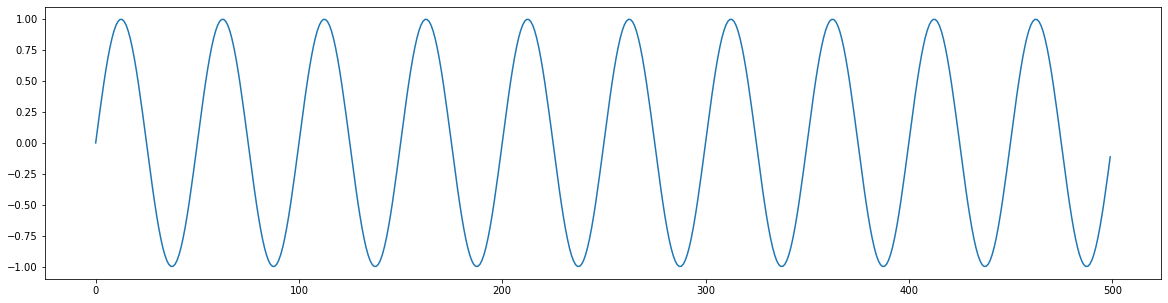

In [42]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

- above we can see the first 500 points generated using the sinosoidal function

- The sin function gave the complete signal. But we need to adapt for this problem (time series problem)
    - To make predictions we need to to have several windows.
    - We will consturct a data set which has 12 datapoints and the label.

In [43]:
## Adapt Data for Time series 
X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

X = np.array(X)
y = np.array(y)

## Normalize the data
- It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.
- The normalization was included on the functions!

## Burn In Effect
- The Network needs to "warm up" to find the direction of the gradient. 
- It is expected to observe impact on the MSE on the second fit.

In [29]:
# 10 epochs will be used for the 1st problem and 
epochs = 10

## i) no noise

### LSTM

4/4 [==============================] - 6s 10ms/step
The mse for the 1st split is: 0.0012703975399702408
3/3 [==============================] - 0s 9ms/step
The mse for the 2nd split is: 0.000512429144547304


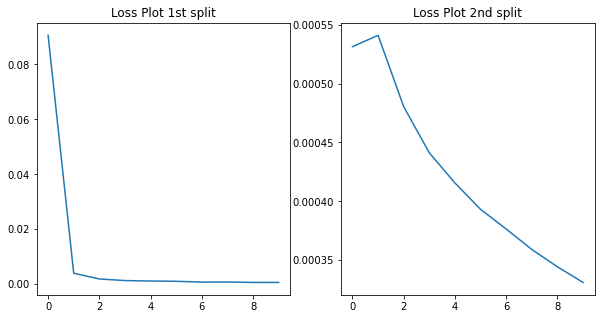

c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


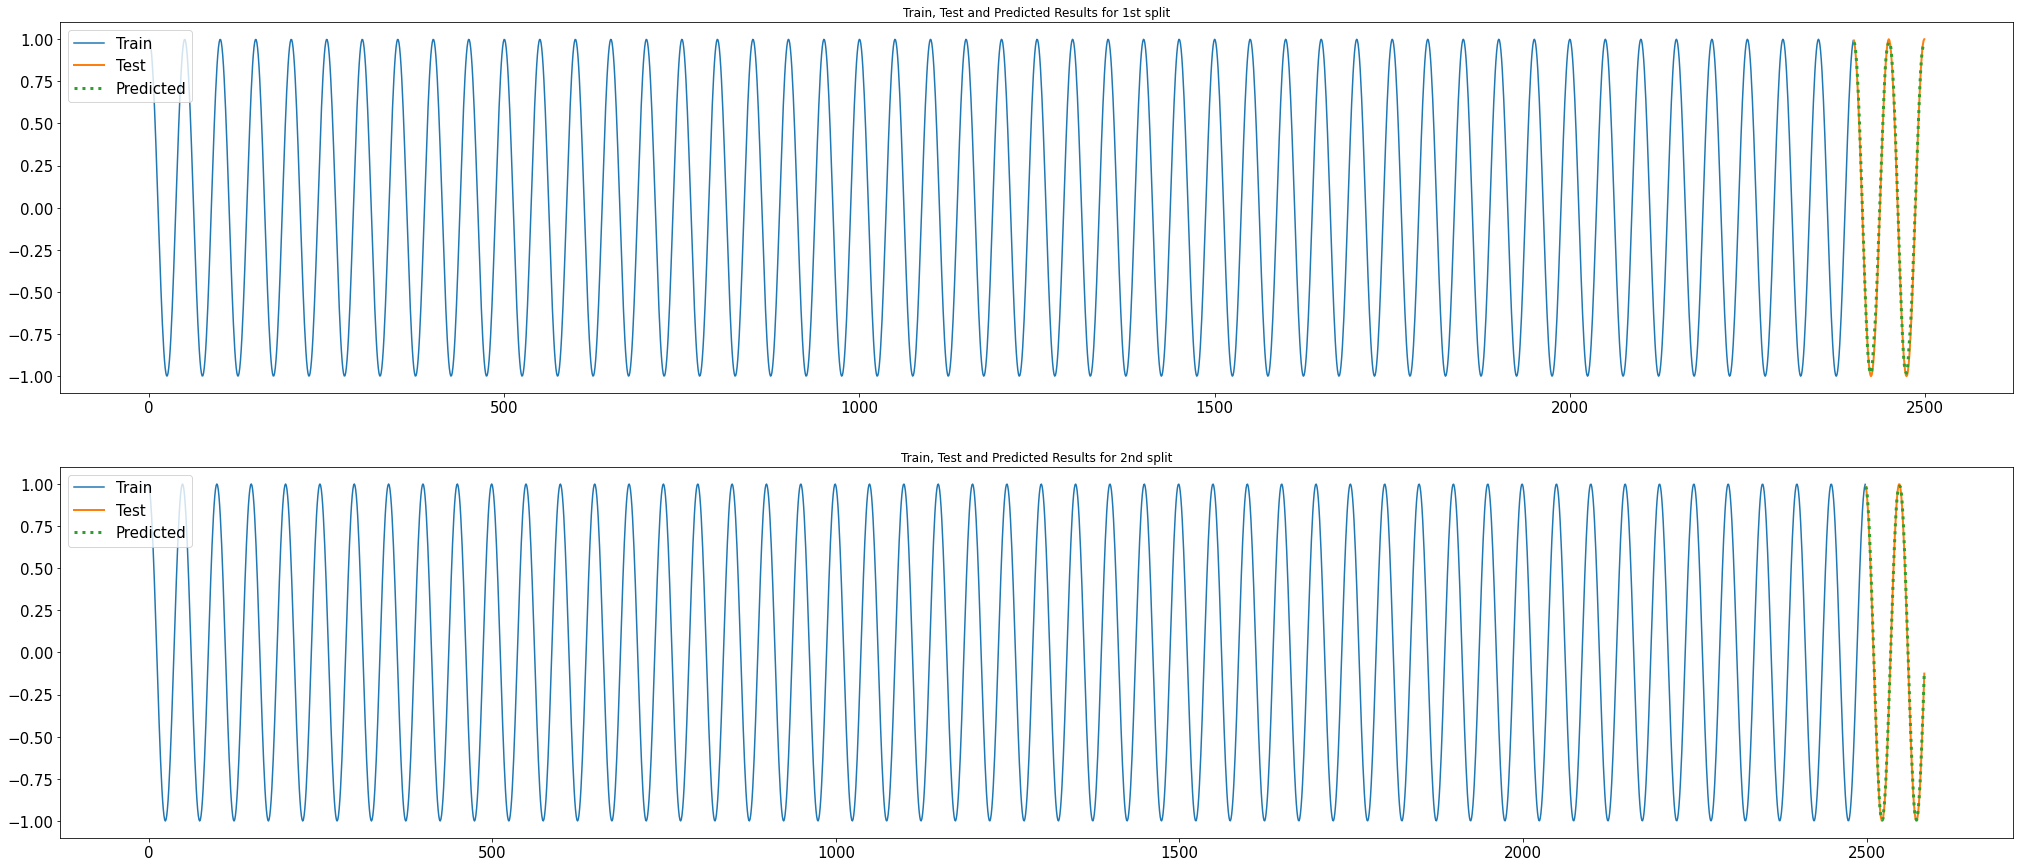

In [30]:
lstm_func(epochs, X, y)

- We can see that the mse of the second split is in fact smaller than mse of the first split, which may probably be related to the burn in efect.
    - Im terms of learning process the second split shows a more stable curve.
- Overall the second split seems to produce a better predictions.

### FTLFN

4/4 [==============================] - 0s 3ms/step
The mse for the 1st split is: 0.0017044849857398518
3/3 [==============================] - 0s 4ms/step
The mse for the 2nd split is: 0.0028668865461539852


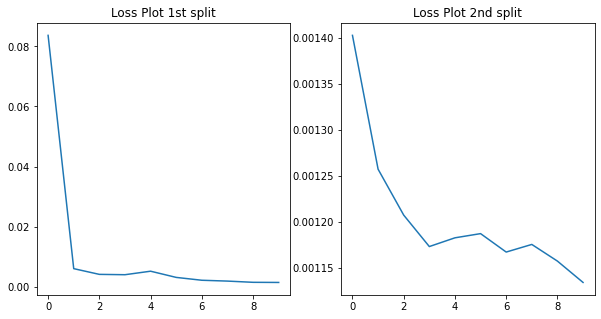

c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


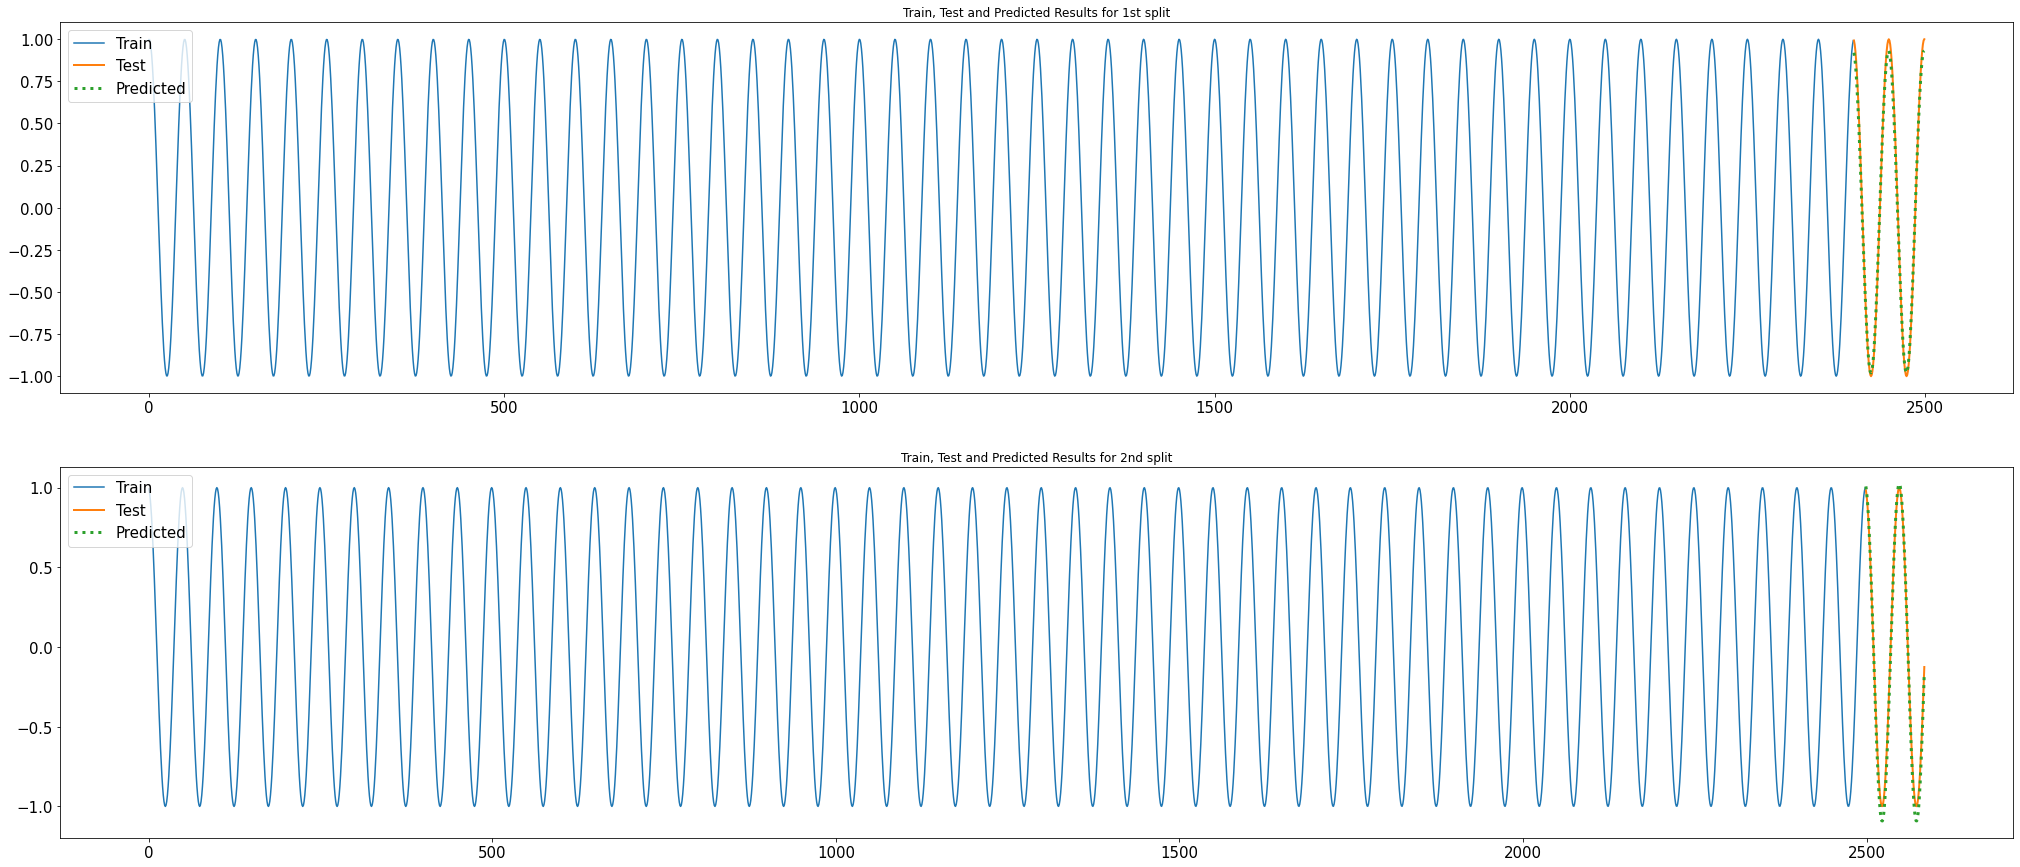

In [45]:
ftlfn_func(epochs, X, y)

- For the FTLFN the behavior seems to be diferent. First the mse of the second split is in fact higher than the one from the first split and the lerning curve seems to be not as stable as the one from the LSTM.
- Even if the final mse value is higher is possible to see that the second split starts with lower mse value on the first epochs when compared to the first split. 

## ii) with noise by adding a Gaussian N(0, 0.05).

- In this second point of problem 1 noise will be added to the data using a Gaussian with distribution (0, 0.05)
- the following function will be used: (np.random(loc=0,scale (0.05, size = data[shape[0]]))

In [33]:
periods = 100
lag = 12
points_per_period = 50

In [46]:
data = np.sin(np.linspace(0,2*np.pi*periods, num=periods*points_per_period)) 
#add noise                                                                                                                                                                                   
data = np.random.normal(loc=0, scale=0.05, size=data.shape[0])

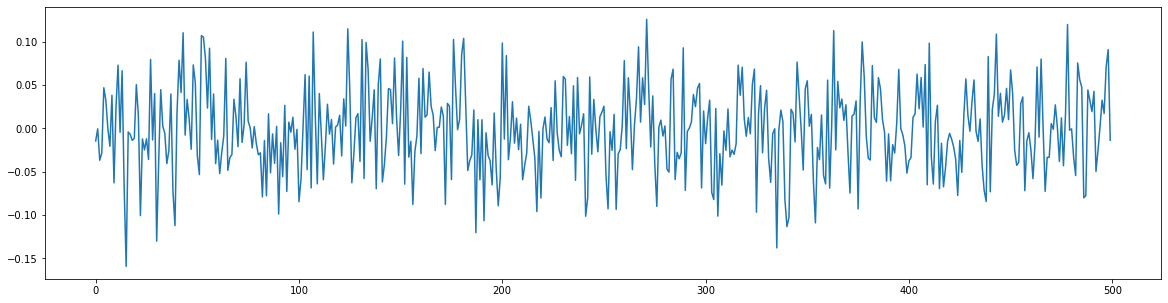

In [47]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

- it is possible to see the de data got much more irregular when a noise of 0.05 was added.
- As in the previous data creation, this one need to be adapted to a time series problem as well.
    - lag of 12 to

In [48]:
X, y = [], []
for i in range(lag, data.shape[0]-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

X = np.array(X)
y = np.array(y)

### LSTM

4/4 [==============================] - 3s 6ms/step
The mse for the 1st split is: 0.003170992951186788
3/3 [==============================] - 0s 9ms/step
The mse for the 2nd split is: 0.002112151572468152


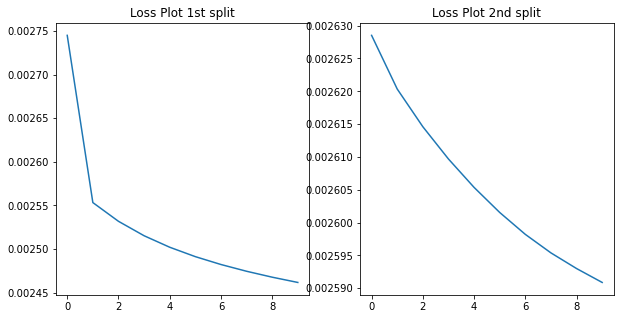

c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


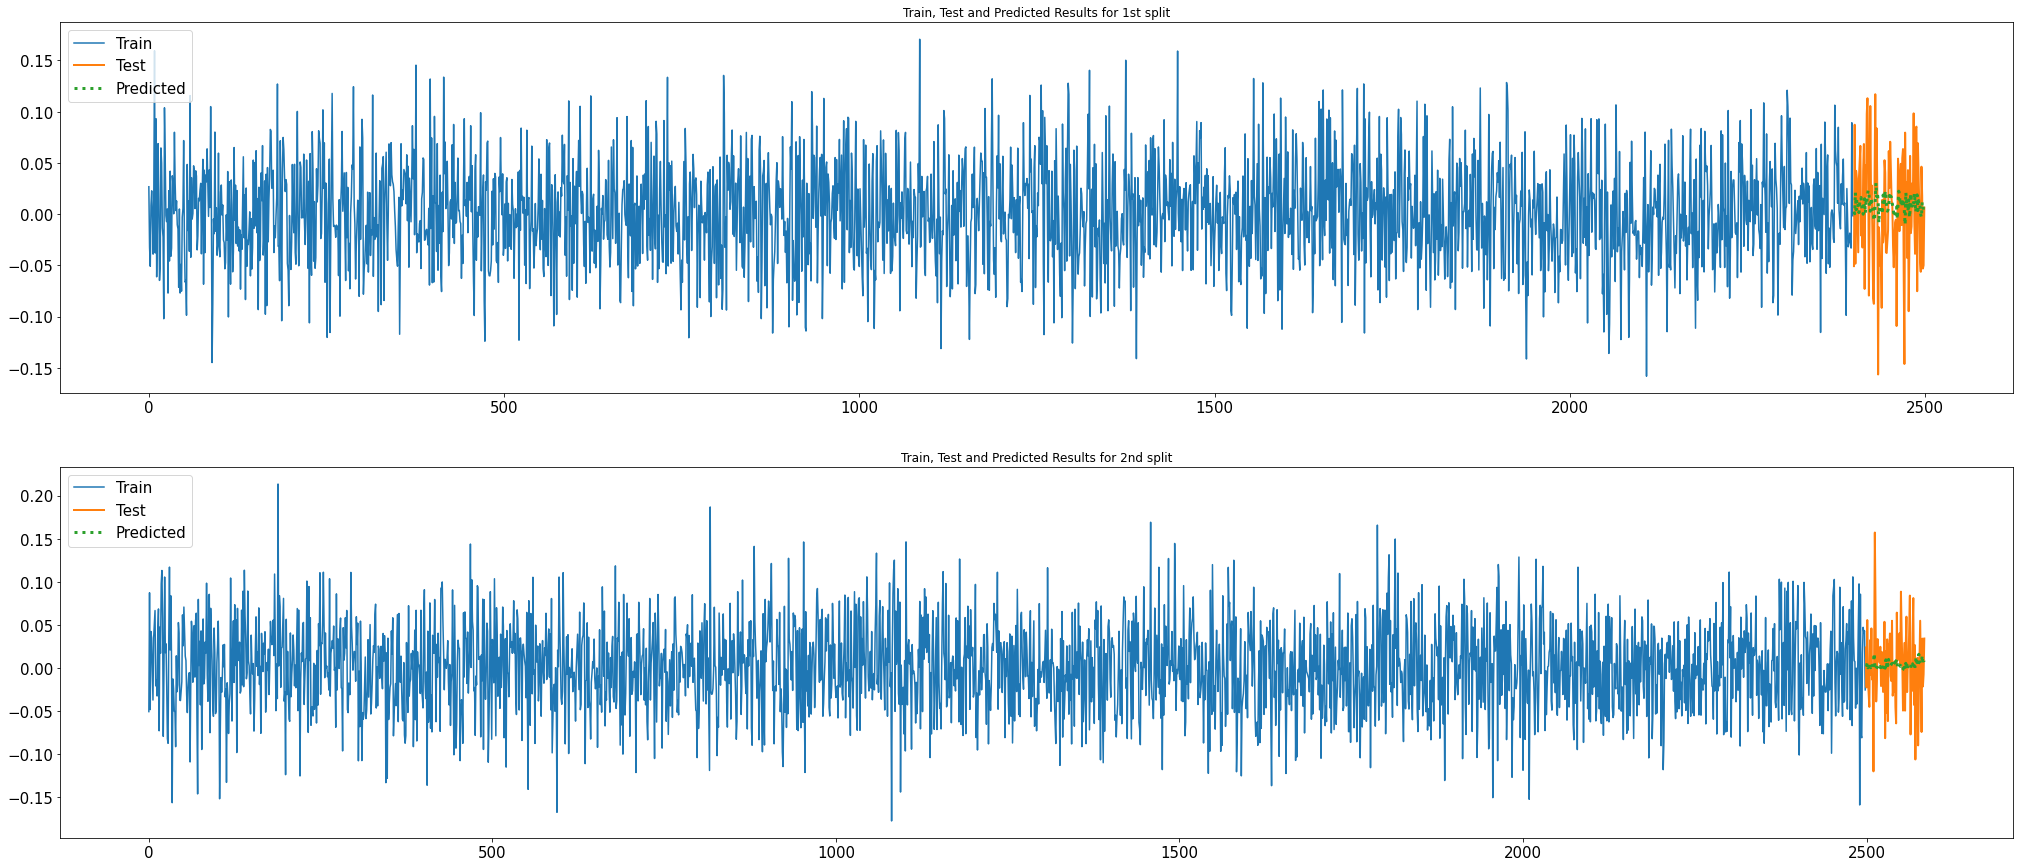

In [37]:
lstm_func(epochs, X, y)

- Again, the second split shows a samller mse when compared to the first split as well as a more stable learning curve.
- When looking at the pred plots it is possible to obser a strange behavior from the preds which seem like they do not correspond to the real values, still the mse's obtained are considered small values which does not correspond to what is observed in the plots. THis may be due to the adition of the noise which creates this visual efect.

### FTLFN

4/4 [==============================] - 0s 4ms/step
The mse for the 1st split is: 0.0030470001100745673
3/3 [==============================] - 0s 7ms/step
The mse for the 2nd split is: 0.0030088509640408836


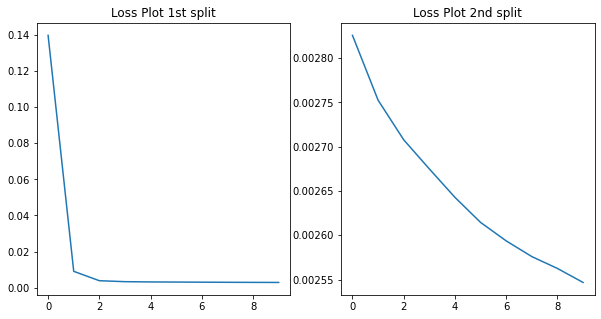

c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\ASobreira\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


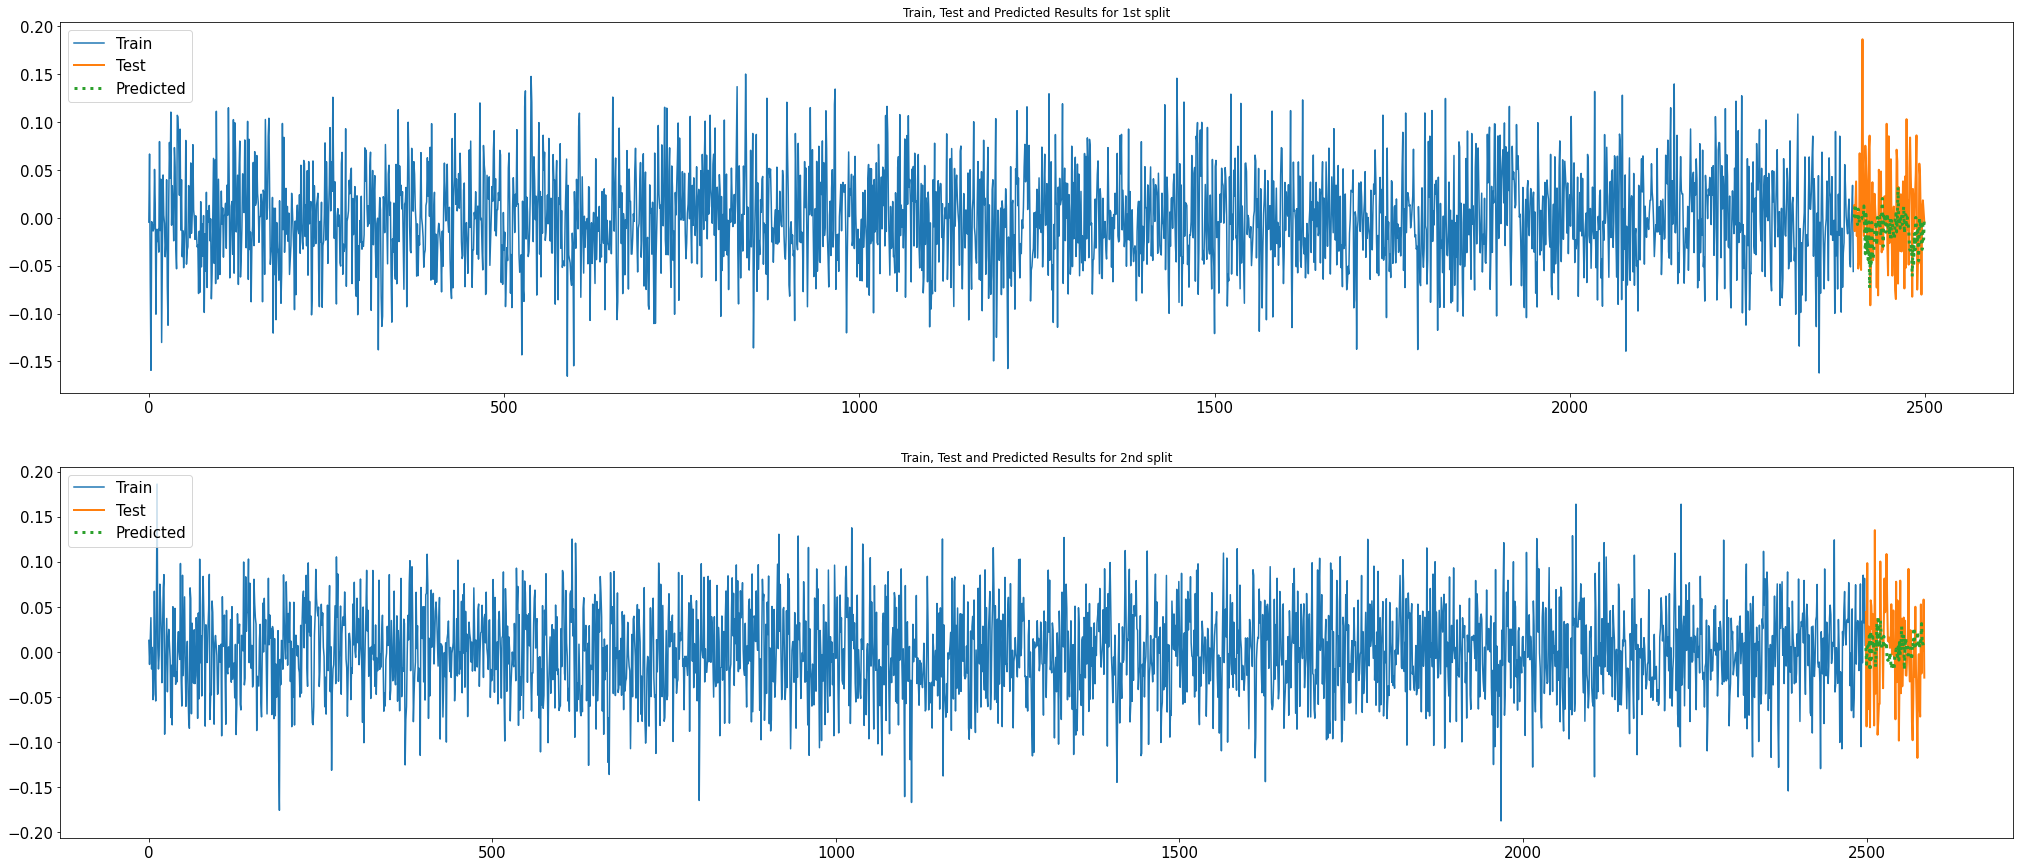

In [49]:
ftlfn_func(epochs, X, y)

- With noise added the FTLFN show a slightly diferent behavior than with out noise. 
- First the mse value of the second split is lower than the first one, as well as the starting values in the first epochs.
- the learning curve of the second split seems to be more stable as well.
- WHen observing the predictions plots, as in the LSTM, a strange behavior is present but still less then with the LSTM. Here the pred seem to distribute better on the true values

# Problem 2

In [62]:
nrEpochs = 50

alpha_one = 0.6
alpha_two = -0.54
alpha_three = -0.44
data = [5,6,3]
nr_datapoints = 5000
X, y = [], []

for i in range(nr_datapoints-3):
    data.append(alpha_one*data[i+2]
    + alpha_two*data[i+1]
    + alpha_three*data[i])

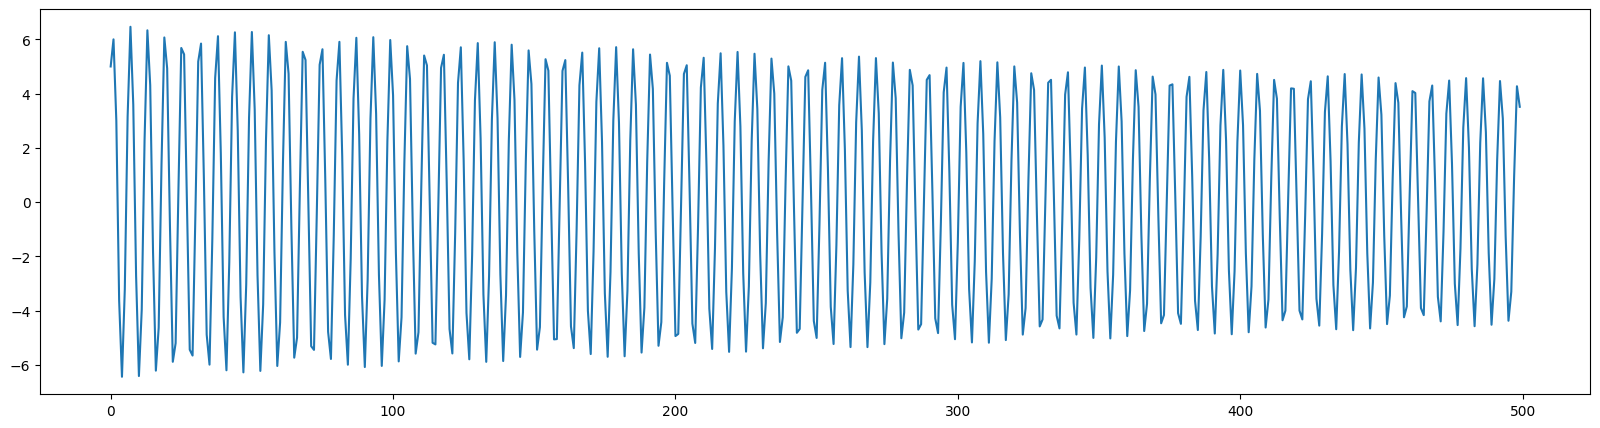

In [63]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

In [64]:
for i in range(lag, len(data)-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)
X = np.array(X)

## i) no noise, clean

### LSTM

1st split
4/4 [==============================] - 0s 1ms/step
2nd split
3/3 [==============================] - 0s 1ms/step
The mse for the 1st split is: 0.002642451820484284 vs 9.952321373521054e-06 for the 2nd split


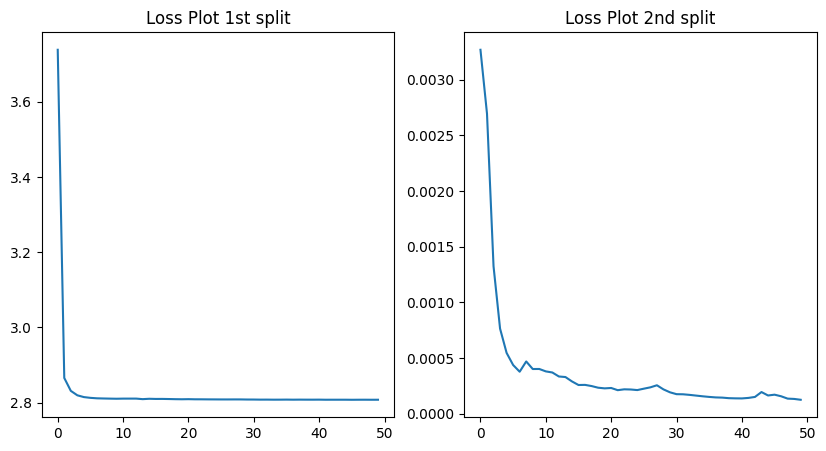

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


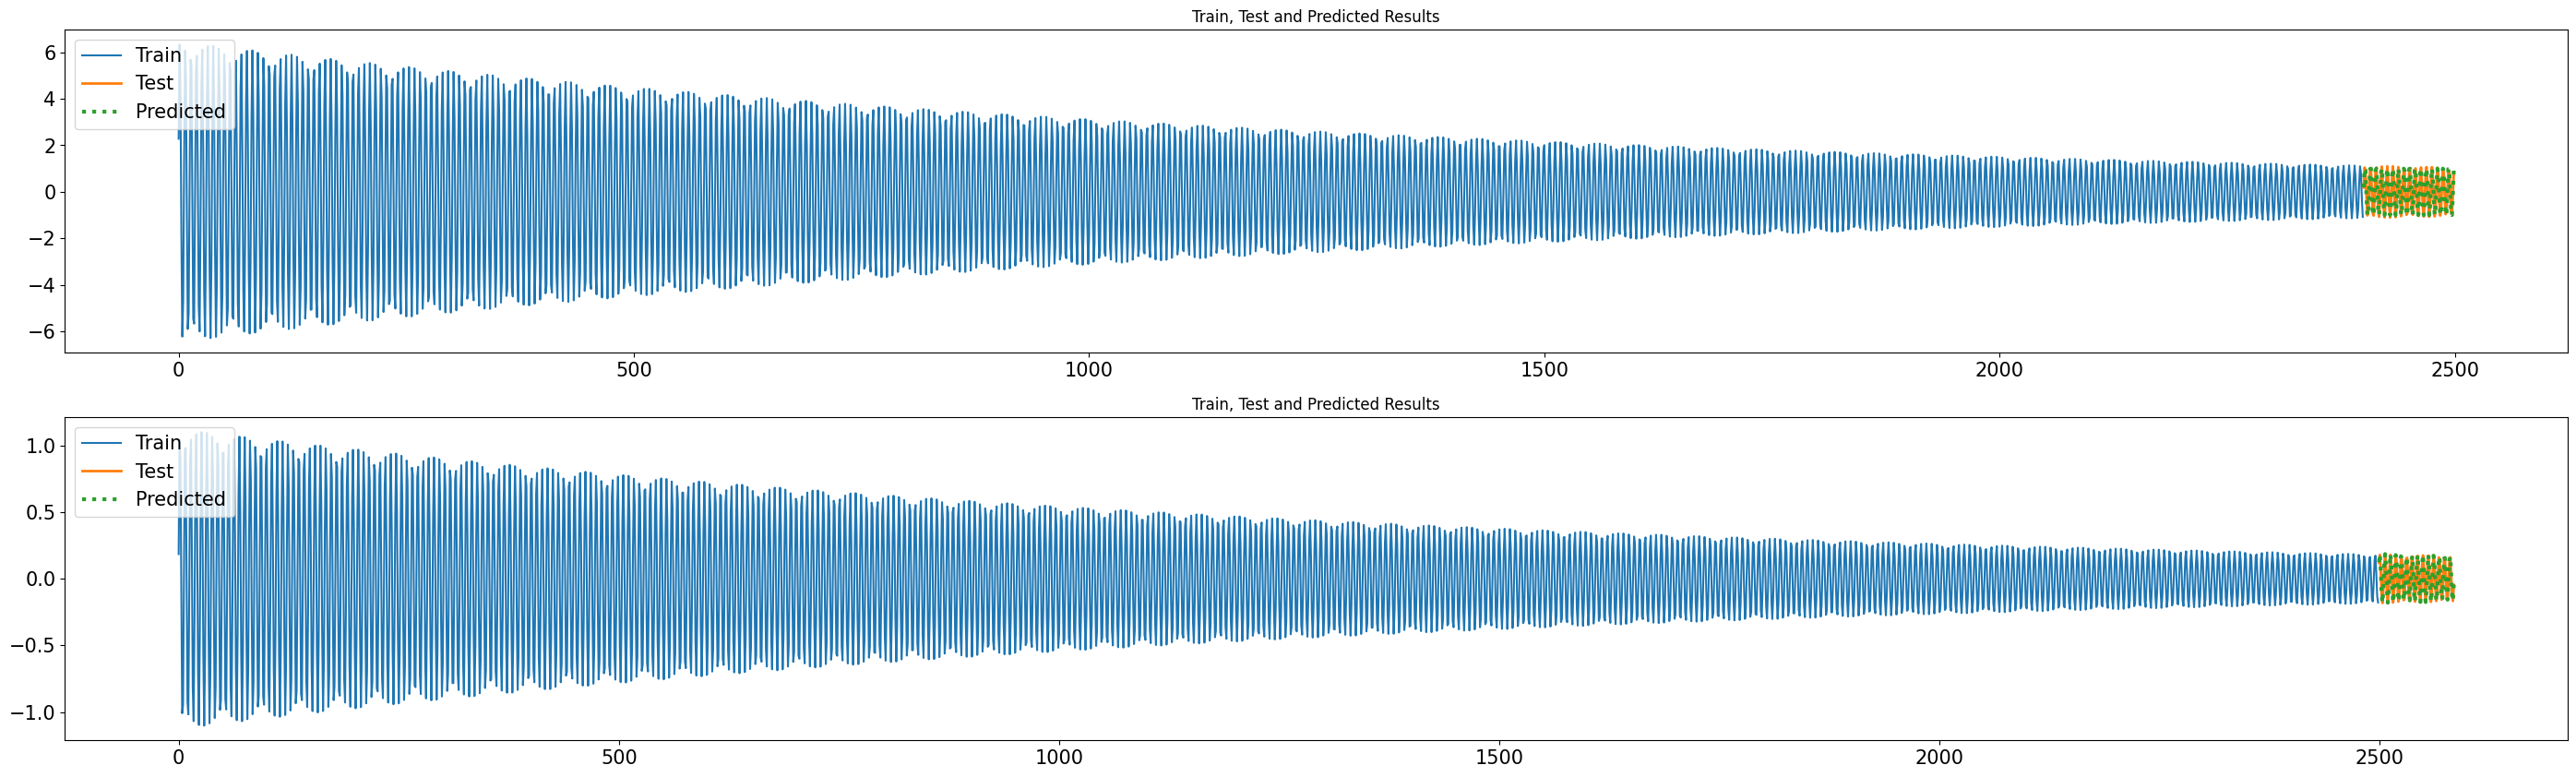

In [65]:
lstm_func(nrEpochs, lag, X, y)

### FTLFN

1st split
4/4 [==============================] - 0s 667us/step
2nd split
3/3 [==============================] - 0s 1000us/step
The mse for the 1st split is: 1.9225370561609625e-07 vs 2.0210350759248922e-14 for the 2nd split


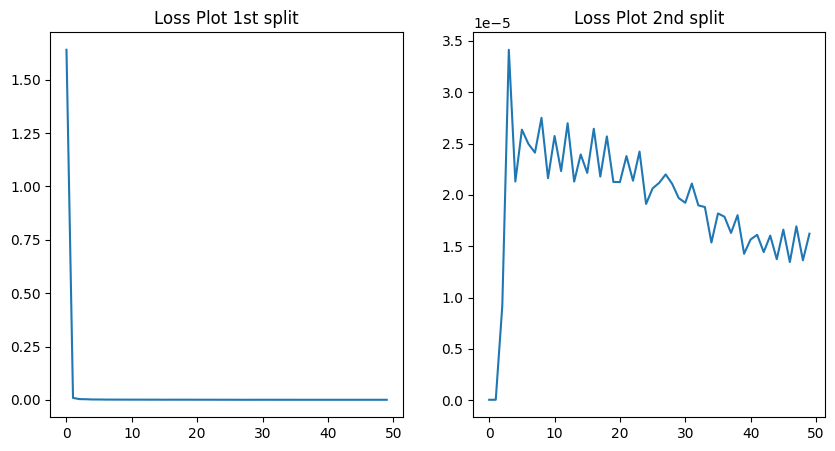

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


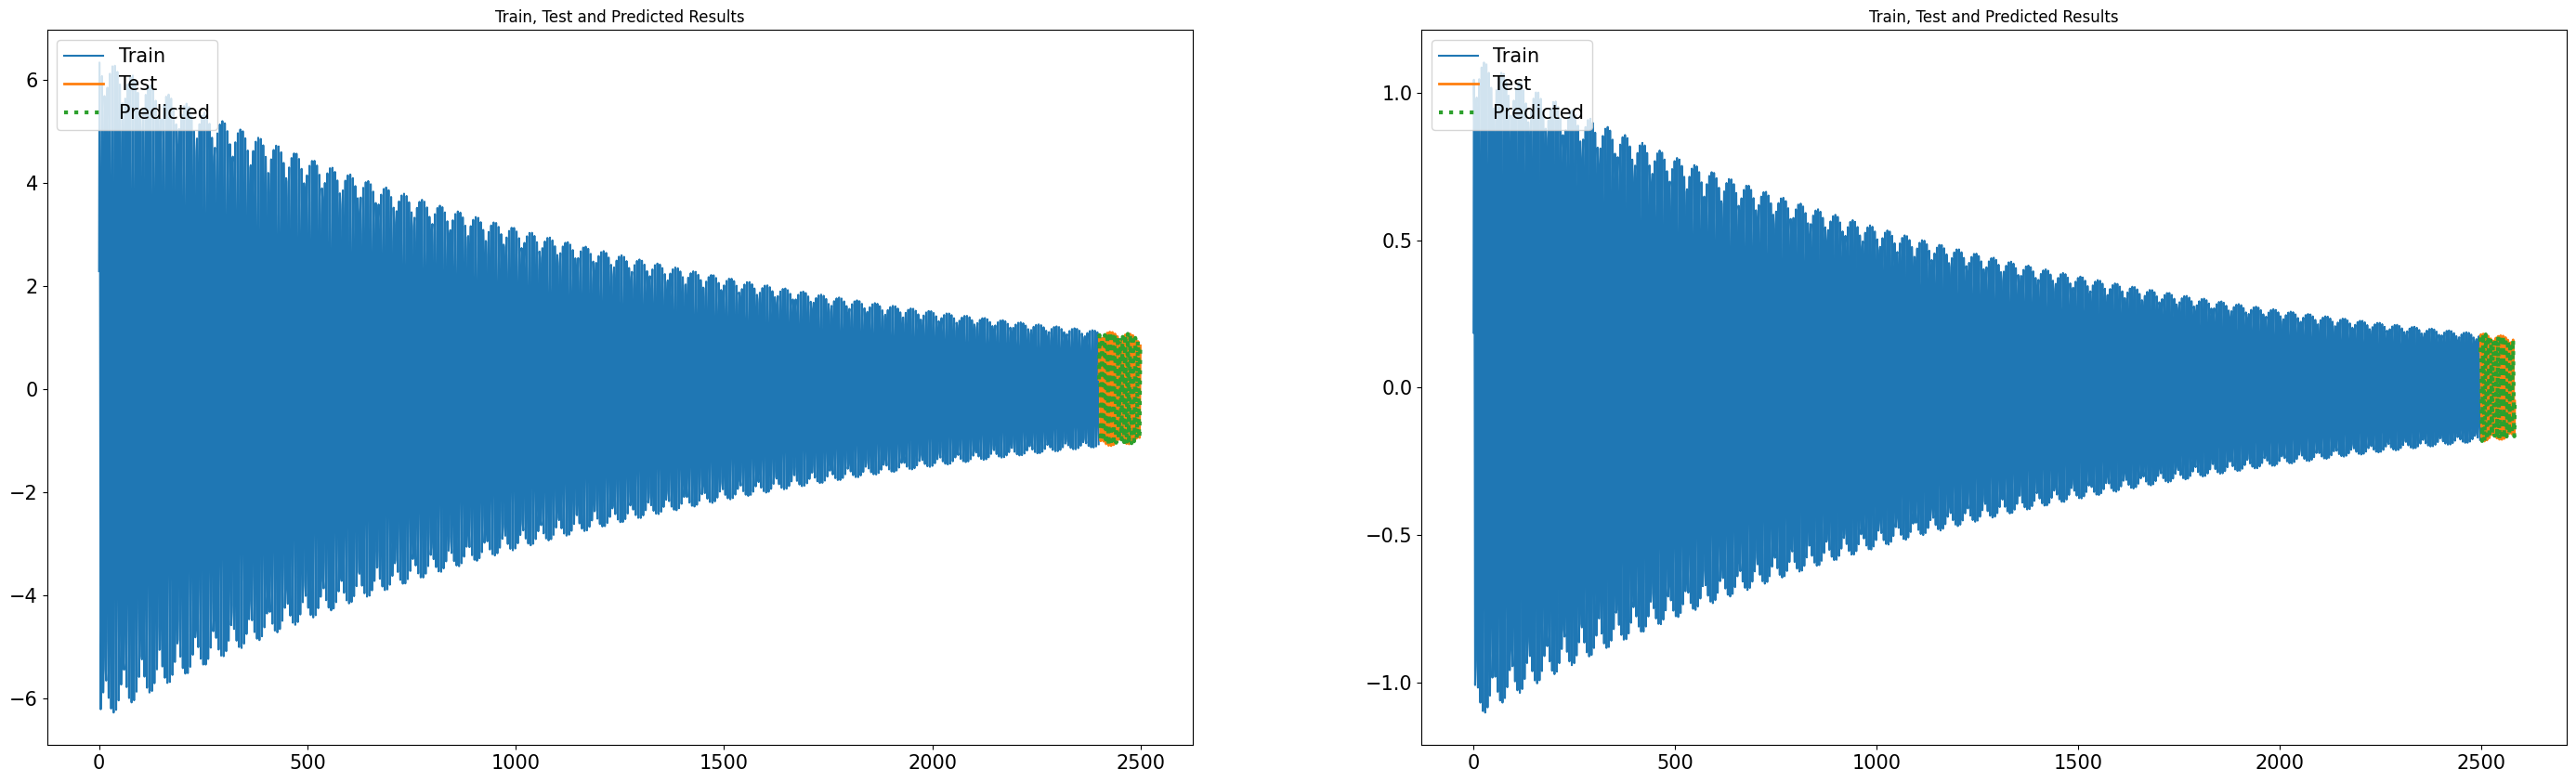

In [45]:
ftlfn_func(nrEpochs, lag, X, y)

## ii) with noise by adding a Gaussian noise N(0, 0.01)

In [2]:
# lets add the lag
alpha_one = 0.6
alpha_two = -0.54
alpha_three = -0.44
data = [5,6,3]
nr_datapoints = 5000

X, y = [], []

for i in range(nr_datapoints-3):
    data.append(alpha_one*data[i+2]
    + alpha_two*data[i+1]
    + alpha_three*data[i] + 0.01)

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(data[0:500])
plt.show()

In [ ]:
for i in range(lag, len(data)-1):
    X.append(data[i-lag:i]) # we getting 12 sample. My x will have 4000 samples each with 12 instances
    y.append(data[i])

y = np.array(y)

### LSTM

In [ ]:
lstm_func(nrEpochs, lag, X, y)

### FTLFN

In [ ]:
ftlfn_func(nrEpochs, lag, X, y)

## Comments

baba


